# 4.2 多层感知机的从零开始实现

我们已经在 :numref:`sec_mlp`中描述了多层感知机（MLP），
现在让我们尝试自己实现一个多层感知机。
为了与之前softmax回归
获得的结果进行比较，
我们将继续使用Fashion-MNIST图像分类数据集


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 1 初始化模型参数

回想一下，Fashion-MNIST中的每个图像由
$28 \times 28 = 784$个灰度像素值组成。
所有图像共分为10个类别。
忽略像素之间的空间结构，
我们可以将每个图像视为具有784个输入特征
和10个类的简单分类数据集。
首先，我们将[**实现一个具有单隐藏层的多层感知机，
它包含256个隐藏单元**]。
注意，我们可以将这两个变量都视为超参数。
通常，我们选择2的若干次幂作为层的宽度。
因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

我们用几个张量来表示我们的参数。
注意，对于每一层我们都要记录一个权重矩阵和一个偏置向量。
跟以前一样，我们要为损失关于这些参数的梯度分配内存。


In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 128

W1 = nn.Parameter(
	torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01
)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(
	torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01
)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

---
## 2 激活函数

为了确保我们对模型的细节了如指掌，
我们将[**实现ReLU激活函数**]，
而不是直接调用内置的`relu`函数。


In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

---
## 3 模型

因为我们忽略了空间结构，
所以我们使用`reshape`将每个二维图像转换为一个长度为`num_inputs`的向量。
只需几行代码就可以(**实现我们的模型**)。


In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)  # 这里“@”代表矩阵乘法
    return (H @ W2 + b2)

---
## 4 损失函数

由于我们已经从零实现过softmax函数，
因此在这里我们直接使用高级API中的内置函数来计算softmax和交叉熵损失。
回想一下我们之前在 :numref:`subsec_softmax-implementation-revisited`中
对这些复杂问题的讨论。
我们鼓励感兴趣的读者查看损失函数的源代码，以加深对实现细节的了解。


In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

---
## 5 训练

幸运的是，[**多层感知机的训练过程与softmax回归的训练过程完全相同**]。
可以直接调用`d2l`包的`train_ch3`函数（参见 :numref:`sec_softmax_scratch` ），
将迭代周期数设置为10，并将学习率设置为0.1.

由于最新的d2l包中没有`train_ch3`这个函数，所以在此`train_ch3.py`将这个函数实现一下。


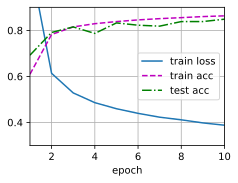

In [7]:
from train_ch3 import train_ch3

num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

为了对学习到的模型进行评估，我们将[**在一些测试数据上应用这个模型**]。


In [1]:
from train_ch3 import predict_ch3

predict_ch3(net, test_iter)

NameError: name 'net' is not defined

---
## 6 小结

* 手动实现一个简单的多层感知机是很容易的。然而如果有大量的层，从零开始实现多层感知机会变得很麻烦（例如，要命名和记录模型的参数）。

---

## 7 练习

1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。

    答：理论上来说，`num_hiddens`越大训练效果越好。

    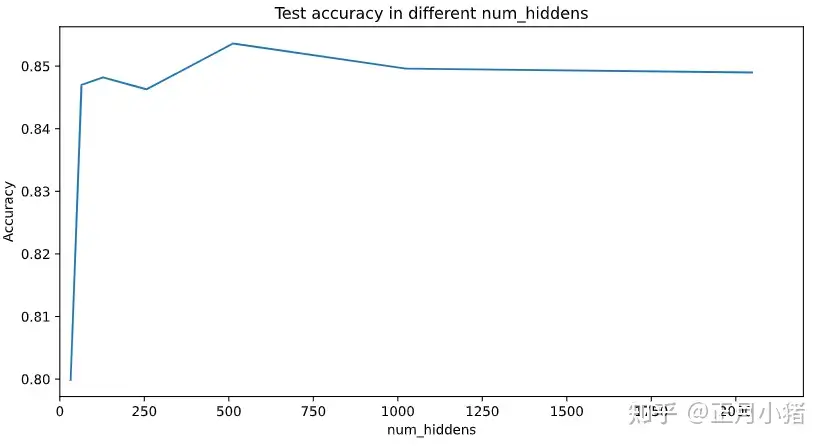

2. 尝试添加更多的隐藏层，并查看它对结果有何影响。

    答：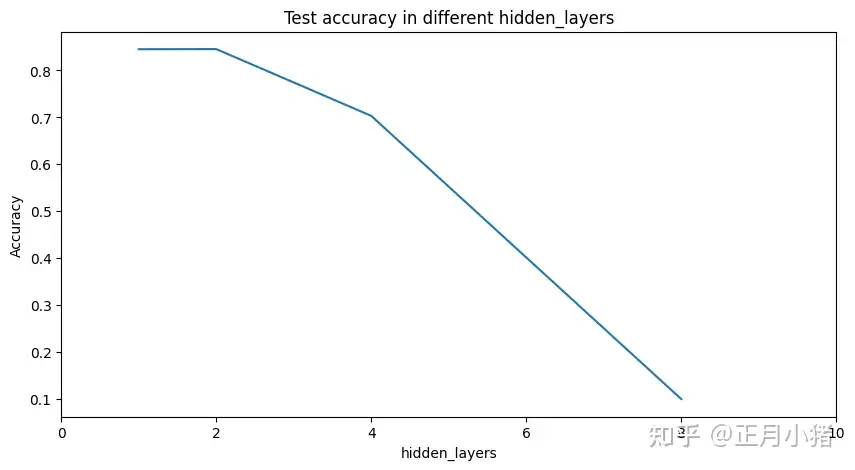

3. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？

    答：较小的学习率：较小的学习率可以增加模型训练的稳定性。参数更新的幅度较小，模型更加稳定地收敛到最优解。然而，较小的学习率可能会导致训练过程非常缓慢，尤其是在复杂问题和大型数据集上。

    较大的学习率：较大的学习率可以加快模型训练的速度。参数更新的幅度较大，模型可以更快地朝着最优解收敛。然而，如果学习率设置得太大，可能会导致模型在训练过程中发散，无法收敛到最优解。

    学习率的选择取决于问题的复杂性、数据集的大小以及模型的架构。

    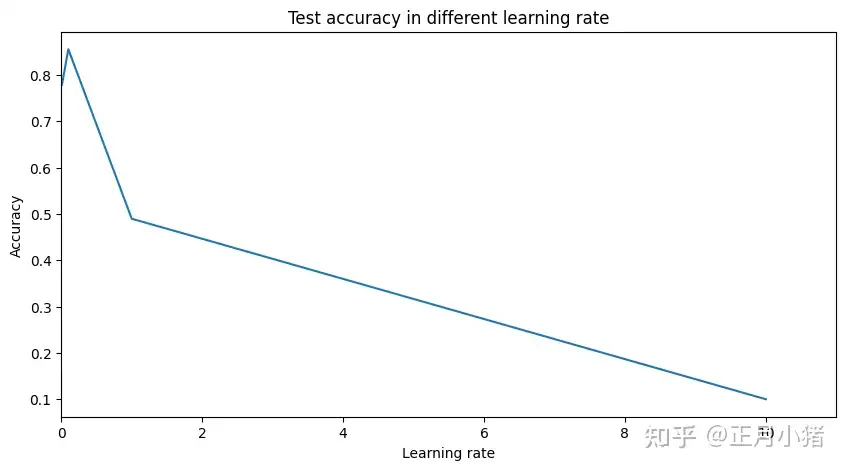

4. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？

    答：

    - Best iteration: 4 
    - Best hyperparameters: {'learning_rate': 0.1, 'num_epochs': 50, 'hidden_layers': 3, 'num_hiddens': 128}
    - Best accuracy: 0.8829

    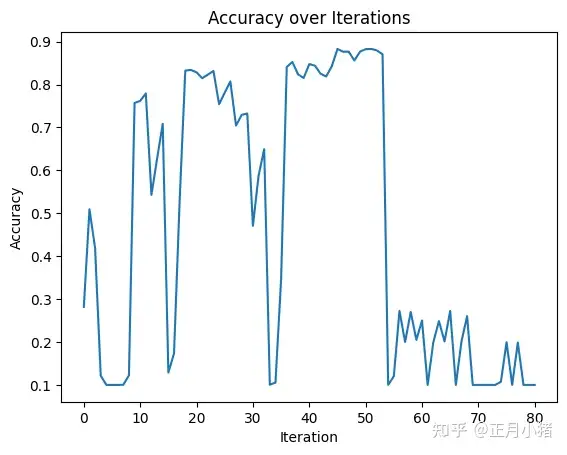

5. 描述为什么涉及多个超参数更具挑战性。

    答：涉及多个超参数的问题更具挑战性，主要有以下几个原因：
   
    1. 组合爆炸：每个超参数都有一定数量的可选值，当超参数的数量增加时，可能的组合数量会呈指数级增长。这导致搜索空间变得非常庞大，需要更多的计算资源和时间才能进行全面搜索。

    2. 交互效应：超参数之间可能存在交互效应，即它们的组合可能会对模型的性能产生非线性的影响。因此，找到最佳的超参数组合并不仅仅是每个超参数的最佳取值，还需要考虑它们之间的相互作用。
    
    3. 评估开销：对于每个超参数组合，都需要进行模型的训练和评估。如果搜索空间很大，需要评估大量的模型，这将带来巨大的计算开销。特别是对于计算资源有限的情况下，可能需要进行合理的优化策略来加速搜索过程。

    4. 噪声和不确定性：模型的性能很可能受到噪声的影响，即在相同的超参数组合下，多次运行可能会得到不同的结果。因此，在选择最佳超参数时，需要考虑到这种噪声和不确定性。

6. 如果想要构建多个超参数的搜索方法，请想出一个聪明的策略。

    答：详见[超参数搜索方法](https://zhuanlan.zhihu.com/p/304373868)


[Discussions](https://discuss.d2l.ai/t/1804)
